## Importación de librerías

In [1]:
# Tratamiento de datos
import pandas as pd

# Visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de ruta
import sys
sys.path.append('../')

# Importar funciones
from src.soporte import analisis_rapido, eda, matriz_correlacion

## Carga de datos

In [2]:
df = pd.read_csv('../data/output/bank-additional_limpio.csv')

In [3]:
df.head()

,age,job,marital,education,housing,loan,contact,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,id_
0,39.977112,housemaid,MARRIED,basic.4y,0.0,0.0,telephone,261,1,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57.000000,services,MARRIED,high.school,0.0,0.0,telephone,149,1,NONEXISTENT,1.1,"93,994","-36,4",unknown,5191,no,e9d37224-cb6f-4942-98d7-46672963d097
2,37.000000,services,MARRIED,high.school,1.0,0.0,telephone,226,1,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,40.000000,admin.,MARRIED,basic.6y,0.0,0.0,telephone,151,1,NONEXISTENT,1.1,"93,994","-36,4",unknown,5191,no,9991fafb-4447-451a-8be2-b0df6098d13e
4,56.000000,services,MARRIED,high.school,0.0,1.0,telephone,307,1,NONEXISTENT,1.1,"93,994","-36,4",unknown,5191,no,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


## Objetivos del análisis

* Identificar qué características de los clientes están asociadas a una mayor tasa de contratación del producto bancario (depósito a plazo bancario).

* Analizar cómo influyen factores como edad, ocupación, nivel educativo, estado civil en la decisión del cliente.

* Explorar patrones de comportamiento a través de datos históricos de las campañas de marketing (duración de llamadas, frecuencia de contacto, canal utilizado...).

* Filtrar y centrar el análisis en registros consistentes y representativos para evitar sesgos en las conclusiones.

## Análisis

In [4]:
def analisis_rapido(df, n=5):
    """ 
    Función que proporciona un análisis rápido del DataFrame.

    Parámetros:
    df: DataFrame
    n: Número de filas (por defecto = 5)
    """

    print(f"Las {n} primeras columnas son:")
    display(df.head(n))
    print("Información básica del DataFrame:")
    display(df.info())

    print(f"El número de duplicados es: {df.duplicated().sum()}")
    display(df.isna().mean().round(4) * 100)

In [5]:
analisis_rapido(df, 3)

Las 3 primeras columnas son:


,age,job,marital,education,housing,loan,contact,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,id_
0,39.977112,housemaid,MARRIED,basic.4y,0.0,0.0,telephone,261,1,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57.000000,services,MARRIED,high.school,0.0,0.0,telephone,149,1,NONEXISTENT,1.1,"93,994","-36,4",unknown,5191,no,e9d37224-cb6f-4942-98d7-46672963d097
2,37.000000,services,MARRIED,high.school,1.0,0.0,telephone,226,1,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,3f9f49b5-e410-4948-bf6e-f9244f04918b


Información básica del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42985 entries, 0 to 42984
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             42985 non-null  float64
 1   job             42985 non-null  object 
 2   marital         42985 non-null  object 
 3   education       42985 non-null  object 
 4   housing         42985 non-null  float64
 5   loan            42985 non-null  float64
 6   contact         42985 non-null  object 
 7   duration        42985 non-null  int64  
 8   campaign        42985 non-null  int64  
 9   poutcome        42985 non-null  object 
 10  emp.var.rate    42985 non-null  float64
 11  cons.price.idx  42985 non-null  object 
 12  cons.conf.idx   42985 non-null  object 
 13  euribor3m       42985 non-null  object 
 14  nr.employed     42985 non-null  object 
 15  y               42985 non-null  object 
 16  id_             42985 non-null  object 
dt

None

El número de duplicados es: 0


age               0.0
job               0.0
marital           0.0
education         0.0
housing           0.0
loan              0.0
contact           0.0
duration          0.0
campaign          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
id_               0.0
dtype: float64

No tenemos nulos ya que está limpia la bd.

### Columnas del dataset

●	``age``: La edad del cliente.

●	``job``: La ocupación o profesión del cliente.

●	``marital``: El estado civil del cliente.

●	``education``: El nivel educativo del cliente.

●	``housing``: Indica si el cliente tiene un préstamo hipotecario (1: Sí, 0: No).

●	``loan``: Indica si el cliente tiene algún otro tipo de préstamo (1: Sí, 0: No).

●	``contact``: El método de contacto utilizado para comunicarse con el cliente.

●	``duration``: La duración en segundos de la última interacción con el cliente.

●	``campaign``: El número de contactos realizados durante esta campaña para este cliente.

●	``poutcome``: Resultado de la campaña de marketing anterior.

●	``emp.var.rate``: La tasa de variación del empleo.

●	``cons.price.idx``: El índice de precios al consumidor.

●	``cons.conf.idx``: El índice de confianza del consumidor.

●	``euribor3m``: La tasa de interés de referencia a tres meses.

●	``nr.employed``: El número de empleados.

●	``y``: Indica si el cliente ha suscrito un producto o servicio (Sí/No).

●	``id_``: Un identificador único para cada registro en el dataset.

## EDA

Variables numéricas:

 Index(['age', 'housing', 'loan', 'duration', 'campaign', 'emp.var.rate'], dtype='object')

Variables categóricas:

 Index(['job', 'marital', 'education', 'contact', 'poutcome', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'id_'],
      dtype='object')
Veamos las estadísticas básicas:



,count,mean,std,min,25%,50%,75%,max
age,42985.0,39.97,9.76,18.0,33.0,39.98,46.0,89.0
housing,42985.0,0.55,0.50,0.0,0.0,1.00,1.0,1.0
loan,42985.0,0.15,0.36,0.0,0.0,0.00,0.0,1.0
duration,42985.0,257.68,258.64,0.0,102.0,179.00,319.0,4918.0
campaign,42985.0,2.57,2.77,1.0,1.0,2.00,3.0,56.0
emp.var.rate,42985.0,0.08,1.57,-3.4,-1.8,1.10,1.4,1.4


,count,unique,top,freq
job,42985,11,admin.,11218
marital,42985,3,MARRIED,26076
education,42985,7,university.degree,14521
contact,42985,2,cellular,27381
poutcome,42985,3,NONEXISTENT,37100
cons.price.idx,42985,26,"93,994",8409
cons.conf.idx,42985,26,"-36,4",8020
euribor3m,42985,310,unknown,9252
nr.employed,42985,11,"5228,1",16980
y,42985,2,no,38148


 
---------- ESTAMOS ANALIZANDO LA COLUMNA: 'job' ----------
Valores únicos: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'entrepreneur' 'student']

Frecuencia de los valores únicos de las categorías


job
admin.           11218
blue-collar       9654
technician        7026
services          4162
management        3050
retired           1780
entrepreneur      1522
self-employed     1489
housemaid         1123
unemployed        1063
student            898
Name: count, dtype: int64

 
---------- ESTAMOS ANALIZANDO LA COLUMNA: 'marital' ----------
Valores únicos: ['MARRIED' 'SINGLE' 'DIVORCED']

Frecuencia de los valores únicos de las categorías


marital
MARRIED     26076
SINGLE      12100
DIVORCED     4809
Name: count, dtype: int64

 
---------- ESTAMOS ANALIZANDO LA COLUMNA: 'education' ----------
Valores únicos: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'university.degree' 'illiterate']

Frecuencia de los valores únicos de las categorías


education
university.degree      14521
high.school             9925
basic.9y                6305
professional.course     5477
basic.4y                4354
basic.6y                2385
illiterate                18
Name: count, dtype: int64

 
---------- ESTAMOS ANALIZANDO LA COLUMNA: 'contact' ----------
Valores únicos: ['telephone' 'cellular']

Frecuencia de los valores únicos de las categorías


contact
cellular     27381
telephone    15604
Name: count, dtype: int64

 
---------- ESTAMOS ANALIZANDO LA COLUMNA: 'poutcome' ----------
Valores únicos: ['NONEXISTENT' 'FAILURE' 'SUCCESS']

Frecuencia de los valores únicos de las categorías


poutcome
NONEXISTENT    37100
FAILURE         4456
SUCCESS         1429
Name: count, dtype: int64

 
---------- ESTAMOS ANALIZANDO LA COLUMNA: 'cons.price.idx' ----------
Valores únicos: ['93,994' '94,465' '93,918' '93,444' '93,798' '93,2' '92,756' '92,843'
 '93,075' '92,893' '92,963' '92,469' '92,201' '92,379' '92,431' '92,649'
 '92,713' '93,369' '93,749' '93,876' '94,055' '94,215' '94,027' '94,199'
 '94,601' '94,767']

Frecuencia de los valores únicos de las categorías


cons.price.idx
93,994    8409
93,918    6937
92,893    5985
93,444    5349
94,465    4522
93,2      3731
93,075    2552
92,201     799
92,963     742
92,431     468
92,649     374
94,215     320
94,199     316
92,843     297
92,379     272
93,369     271
94,027     240
94,055     236
93,876     222
94,601     212
92,469     184
92,713     179
93,749     179
94,767     130
93,798      48
92,756      11
Name: count, dtype: int64

 
---------- ESTAMOS ANALIZANDO LA COLUMNA: 'cons.conf.idx' ----------
Valores únicos: ['-36,4' '-41,8' '-42,7' '-36,1' '-40,4' '-42' '-45,9' '-50' '-47,1'
 '-46,2' '-40,8' '-33,6' '-31,4' '-29,8' '-26,9' '-30,1' '-33' '-34,8'
 '-34,6' '-40' '-39,8' '-40,3' '-38,3' '-37,5' '-49,5' '-50,8']

Frecuencia de los valores únicos de las categorías


cons.conf.idx
-36,4    8020
-42,7    7004
-46,2    6057
-36,1    5408
-41,8    4568
-42      3782
-47,1    2581
-31,4     811
-40,8     748
-26,9     474
-30,1     378
-40,3     328
-37,5     318
-50       298
-34,8     275
-29,8     275
-38,3     243
-39,8     239
-40       223
-49,5     214
-33,6     185
-34,6     183
-33       181
-50,8     133
-40,4      48
-45,9      11
Name: count, dtype: int64

 
---------- ESTAMOS ANALIZANDO LA COLUMNA: 'euribor3m' ----------
Valores únicos: ['4,857' 'unknown' '4,856' '4,855' '4,859' '4,86' '4,858' '4,864' '4,865'
 '4,866' '4,967' '4,961' '4,959' '4,958' '4,96' '4,962' '4,955' '4,947'
 '4,956' '4,966' '4,963' '4,957' '4,968' '4,97' '4,965' '4,964' '5,045'
 '4,936' '4,921' '4,918' '4,912' '4,827' '4,794' '4,76' '4,733' '4,7'
 '4,663' '4,592' '4,474' '4,406' '4,343' '4,286' '4,245' '4,223' '4,191'
 '4,153' '4,12' '4,076' '4,021' '3,901' '3,879' '3,853' '3,743' '3,563'
 '3,488' '3,428' '3,329' '3,282' '3,053' '1,811' '1,799' '1,778' '1,757'
 '1,726' '1,703' '1,687' '1,663' '1,65' '1,64' '1,629' '1,614' '1,602'
 '1,584' '1,56' '1,556' '1,548' '1,538' '1,531' '1,52' '1,51' '1,498'
 '1,483' '1,479' '1,466' '1,453' '1,445' '1,435' '1,423' '1,415' '1,41'
 '1,405' '1,406' '1,4' '1,392' '1,384' '1,372' '1,365' '1,354' '1,344'
 '1,334' '1,327' '1,313' '1,299' '1,291' '1,281' '1,266' '1,25' '1,244'
 '1,259' '1,264' '1,27' '1,262' '1,26' '1,268' '1,286' 

euribor3m
unknown    9252
4,857      2287
4,962      2124
4,963      2019
4,961      1594
           ... 
5,045         1
4,921         1
0,956         1
0,894         1
0,953         1
Name: count, Length: 310, dtype: int64

 
---------- ESTAMOS ANALIZANDO LA COLUMNA: 'nr.employed' ----------
Valores únicos: ['5191' '5228,1' '5195,8' '5176,3' '5099,1' '5076,2' '5017,5' '5023,5'
 '5008,7' '4991,6' '4963,6']

Frecuencia de los valores únicos de las categorías


nr.employed
5228,1    16980
5099,1     8936
5191       8020
5195,8     3830
5076,2     1744
5017,5     1127
4991,6      810
5008,7      681
4963,6      665
5023,5      181
5176,3       11
Name: count, dtype: int64

 
---------- ESTAMOS ANALIZANDO LA COLUMNA: 'y' ----------
Valores únicos: ['no' 'yes']

Frecuencia de los valores únicos de las categorías


y
no     38148
yes     4837
Name: count, dtype: int64

 
---------- ESTAMOS ANALIZANDO LA COLUMNA: 'id_' ----------
Valores únicos: ['089b39d8-e4d0-461b-87d4-814d71e0e079'
 'e9d37224-cb6f-4942-98d7-46672963d097'
 '3f9f49b5-e410-4948-bf6e-f9244f04918b' ...
 'cadadd4b-7ee5-4019-b13a-ca01bb67ca5b'
 '5f432048-d515-4bb5-9c94-62db451f88d4'
 '993bbbd6-4dbc-4a40-a408-f91f8462bee6']

Frecuencia de los valores únicos de las categorías


id_
993bbbd6-4dbc-4a40-a408-f91f8462bee6    1
089b39d8-e4d0-461b-87d4-814d71e0e079    1
e9d37224-cb6f-4942-98d7-46672963d097    1
3f9f49b5-e410-4948-bf6e-f9244f04918b    1
9991fafb-4447-451a-8be2-b0df6098d13e    1
                                       ..
54b1ea8a-a909-45d9-9562-775b64ac9c29    1
66a752e2-b2f1-440c-9a8f-cc3b10d74dd0    1
ca5c0d7a-8bbd-42b3-8351-1074c5be011a    1
8d700df5-0c33-4517-8cf8-92e1c92c9c12    1
ea6b7d04-9271-4c0a-a01f-07795d164aba    1
Name: count, Length: 42985, dtype: int64

Vayamos con los countplots:



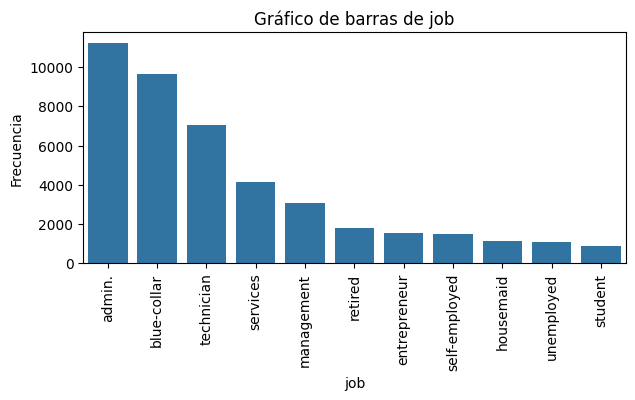

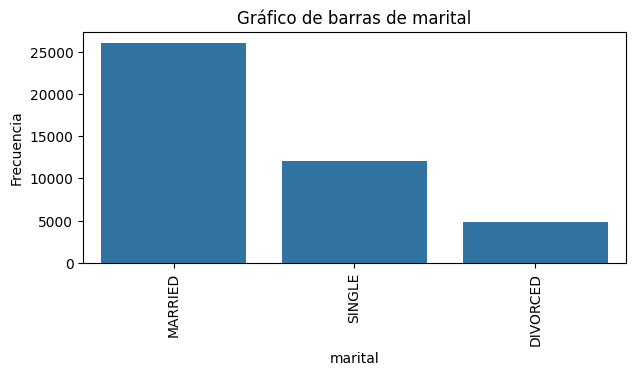

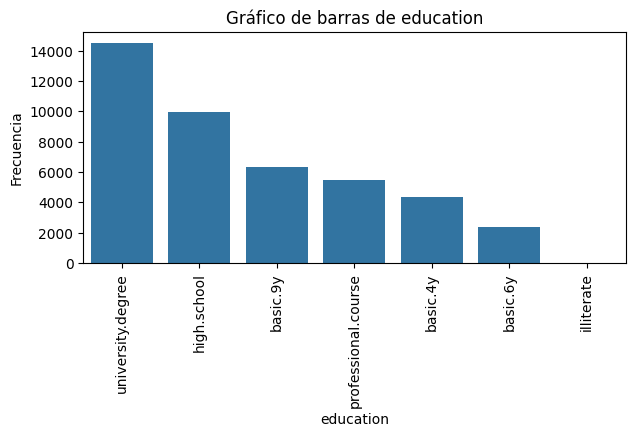

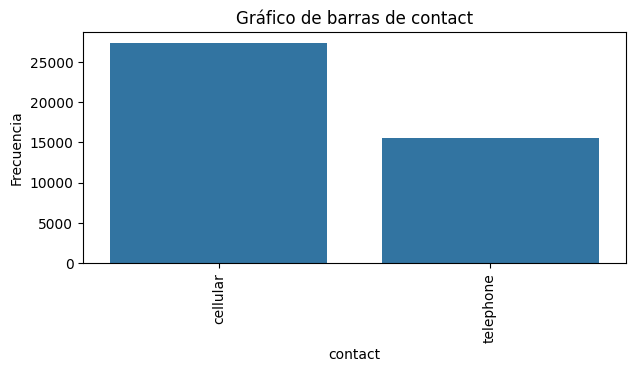

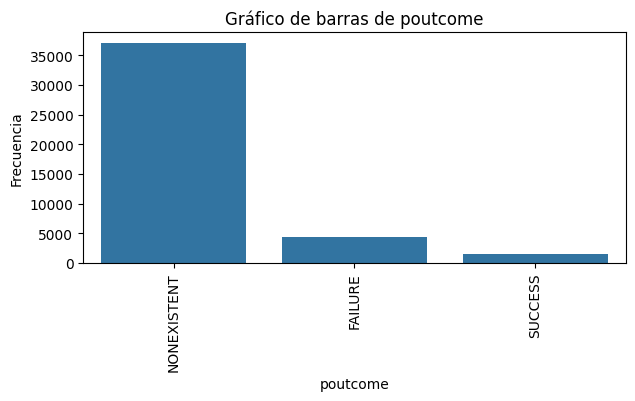

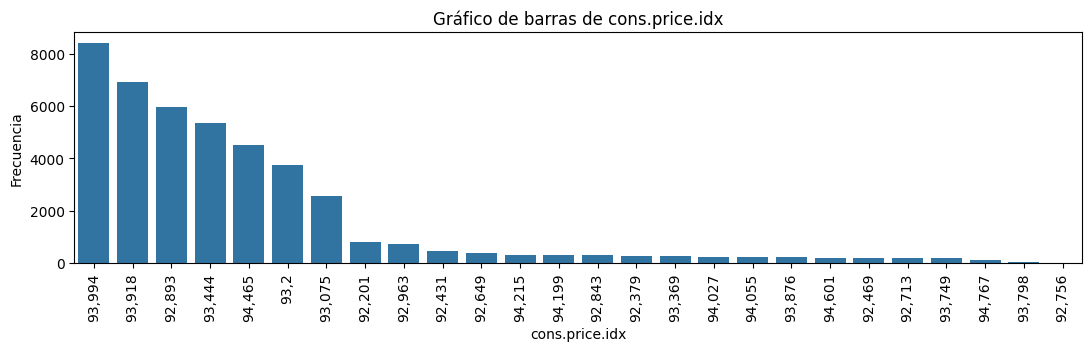

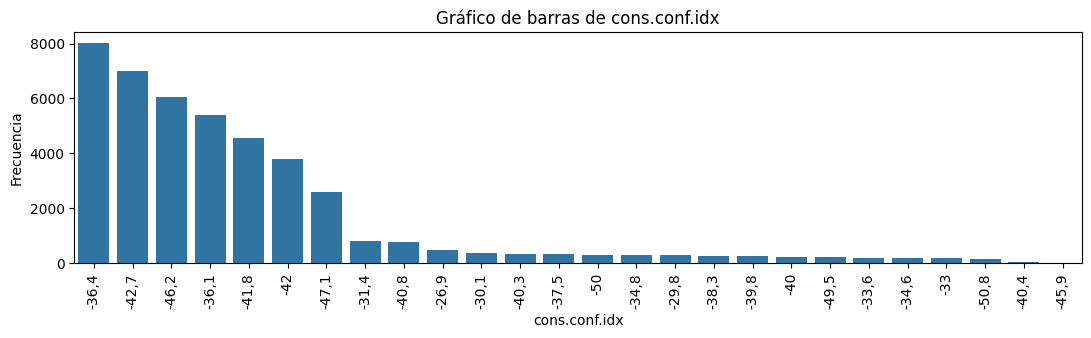

Columna euribor3m tiene demasiadas categorías (310)




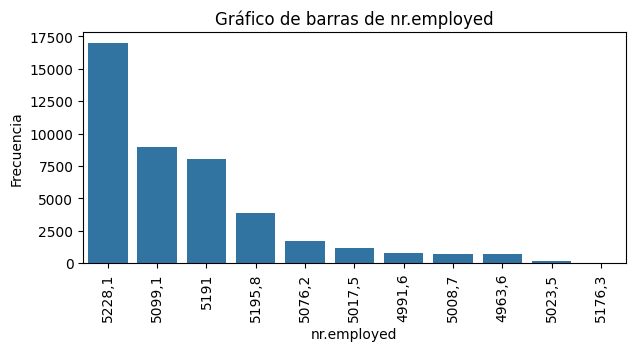

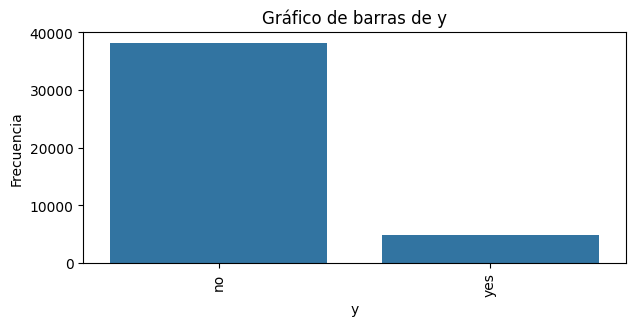

Columna id_ tiene demasiadas categorías (42985)


Vayamos con los histogramas:



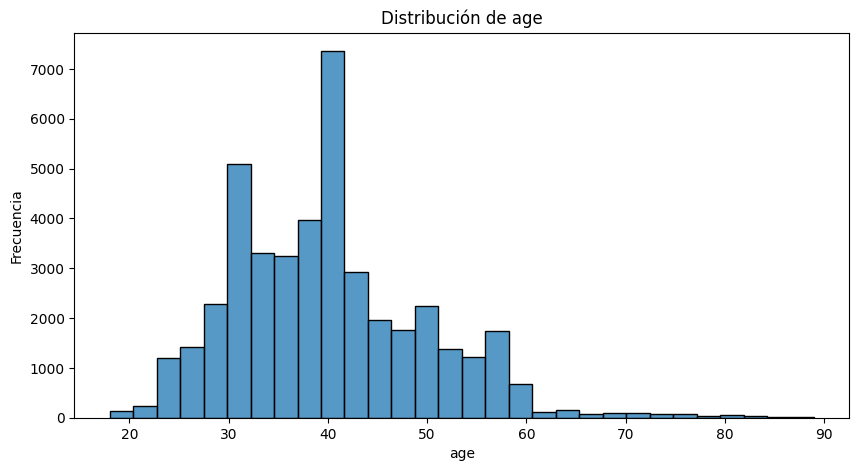

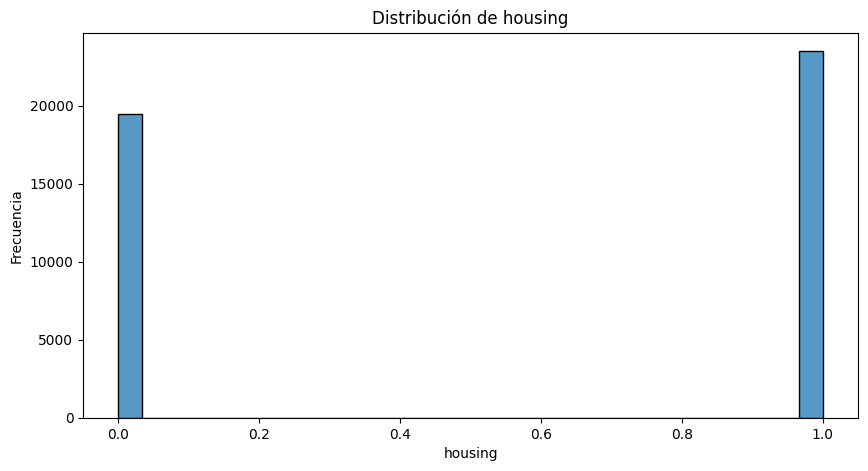

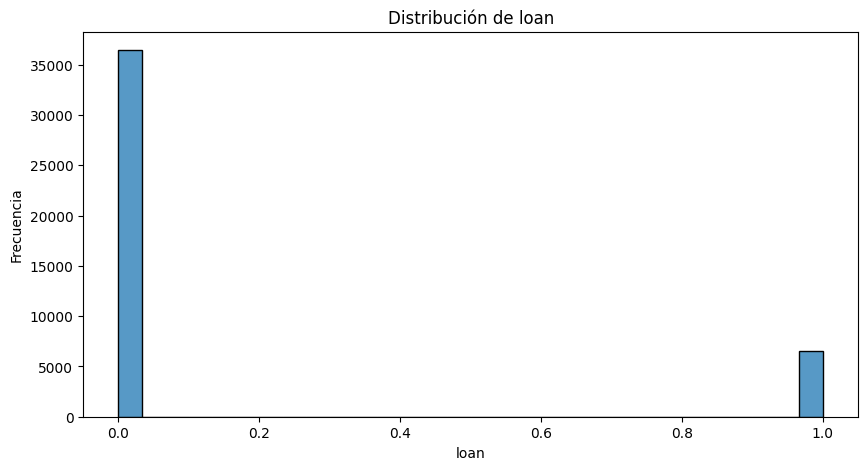

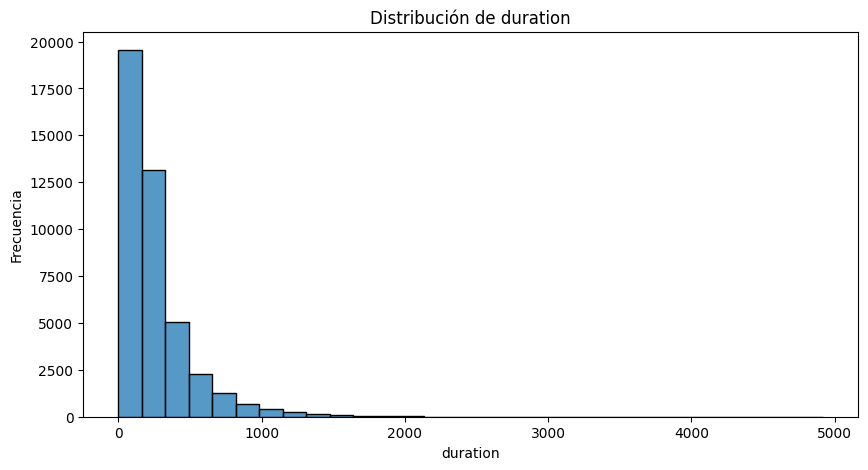

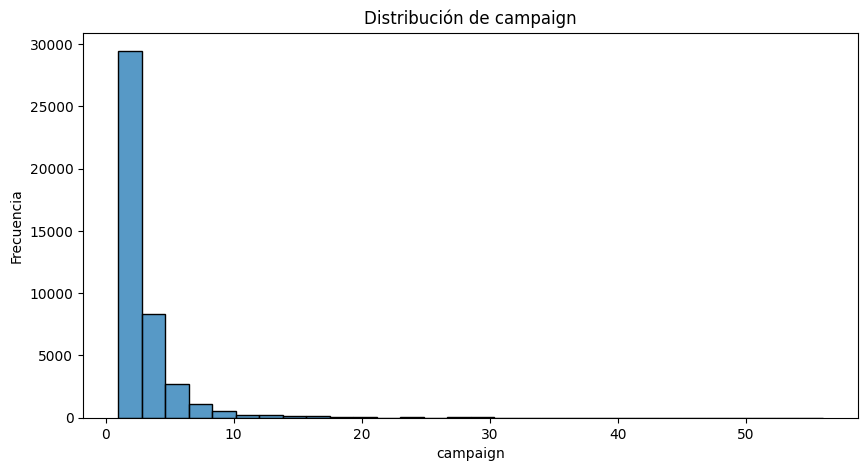

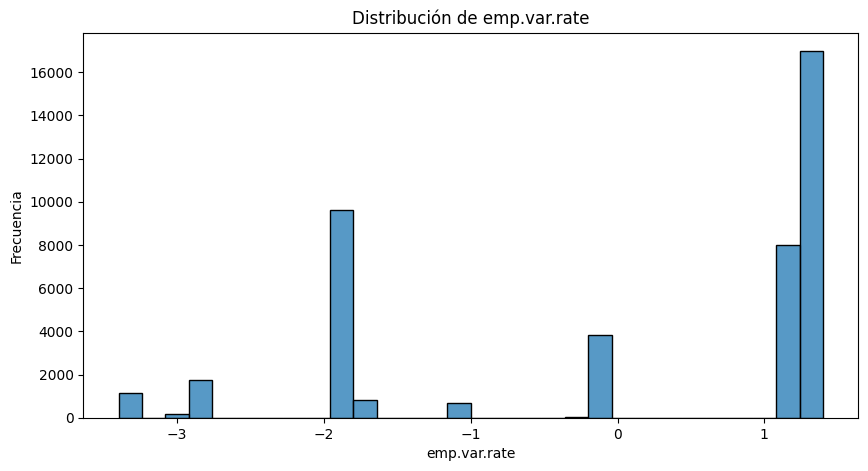

Vayamos con los boxplots:



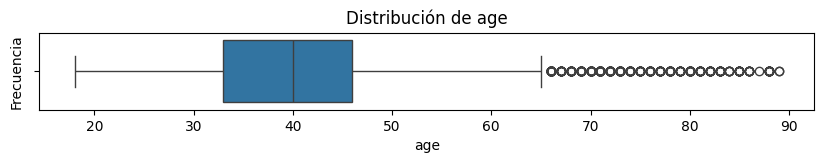

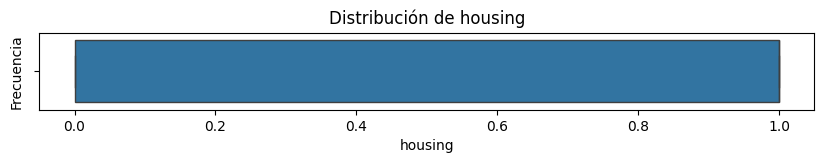

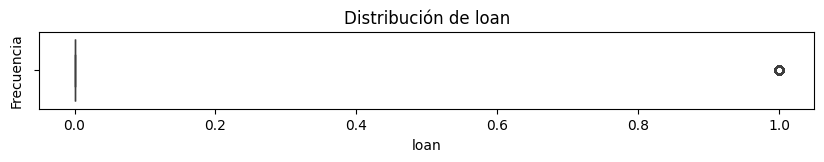

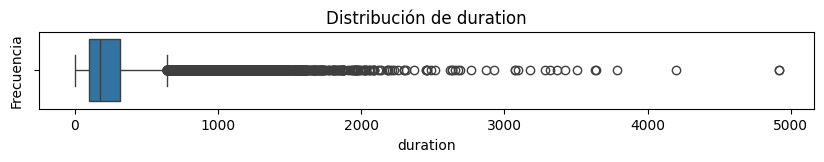

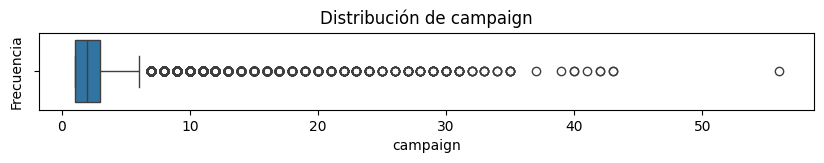

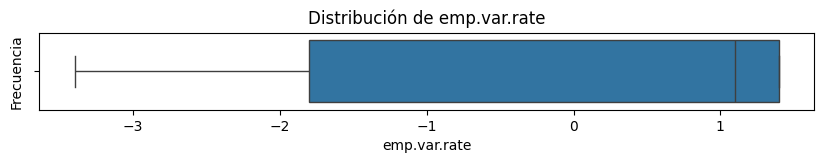

In [6]:
eda(df)

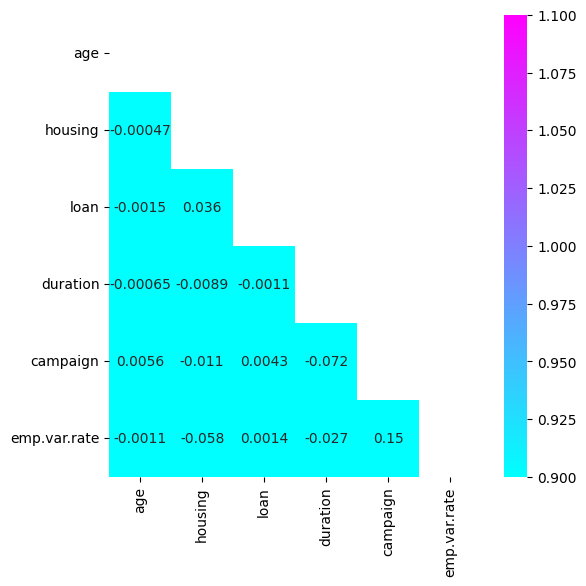

In [7]:
matriz_correlacion(df)

Podemos observar en la matriz de correlación que ninguna variable tiene relación, lo cual es muy extraño.

## Relaciones cruzadas

In [15]:
df.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'duration', 'campaign', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'id_'],
      dtype='object')

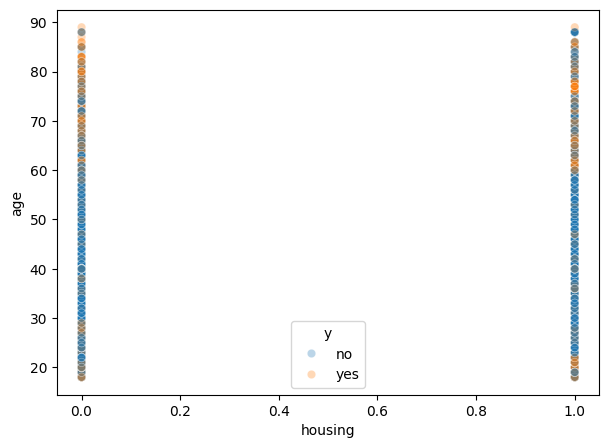

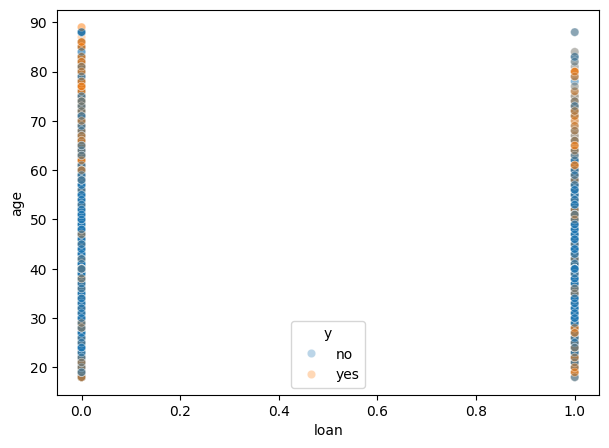

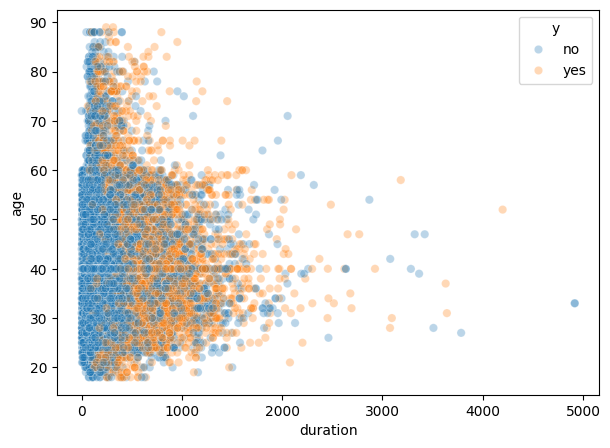

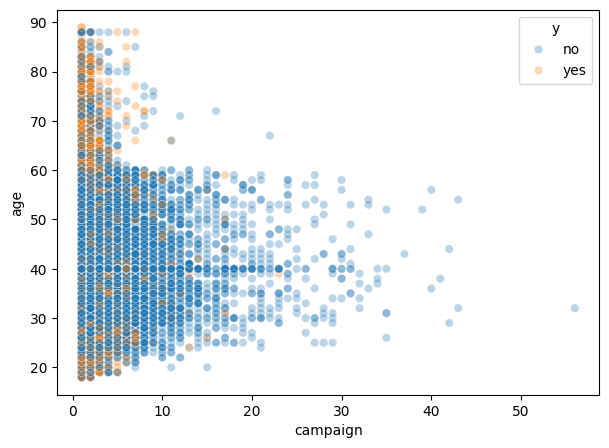

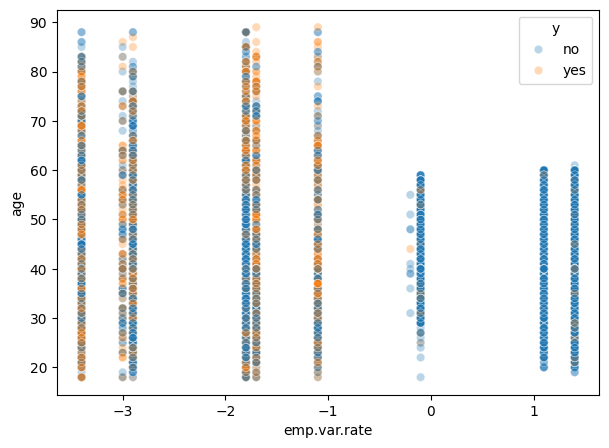

In [16]:
col_num = 'age'
col_cat = 'y'

cols_num = df.select_dtypes(include='number').columns

for col in cols_num:
    
    if col == col_num:
        continue

    plt.figure(figsize=(7,5))
    sns.scatterplot(data=df, x=col, y=col_num, hue=col_cat, alpha=0.3)
    # plt.scale('log'))
    plt.show()

* En el gráfico de relaciones cruzadas de `age` y `housing` y en el de age y loan podemos observar que cuanto menor es la edad menos préstamos hipotecarios tienen.

* En el gráfico de relaciones cruzadas de `age` y `duration` se observa que los que si tienen suscrito un producto, mayor es el tiempo contactado.

* En el gráfico de relaciones cruzadas de `age` y `campaign` se observa que las personas de mayor edad tienen más productos bancarios, pero no sé si se tratan de outliers.

* En el gráfico de relaciones cruzadas de `age` y `emp.var.rate` (tasa de variación del empleo) indica que cuanto menor es la variación del empleo más productos bancarios se piden.



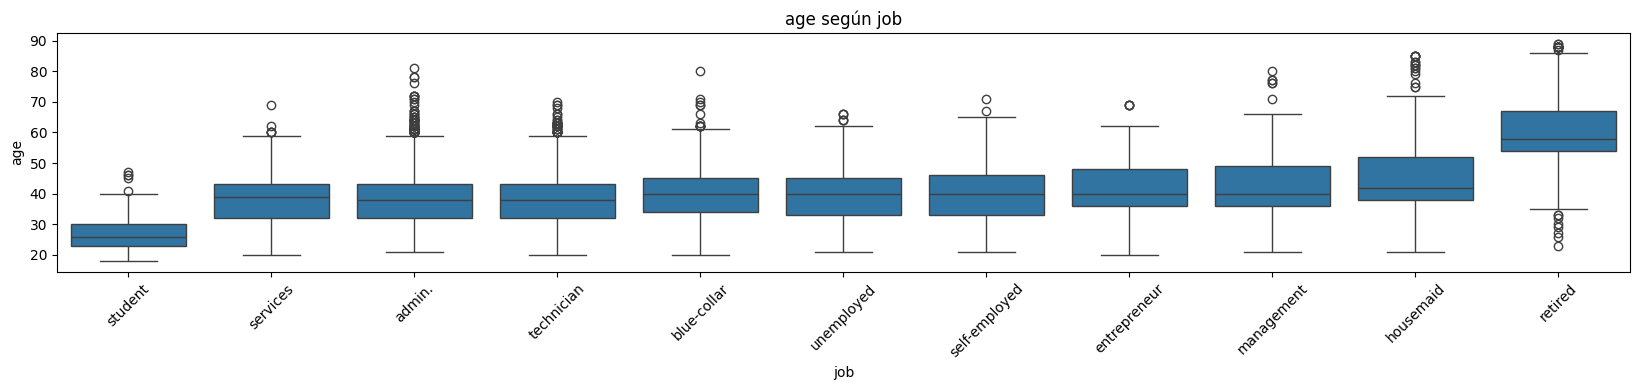

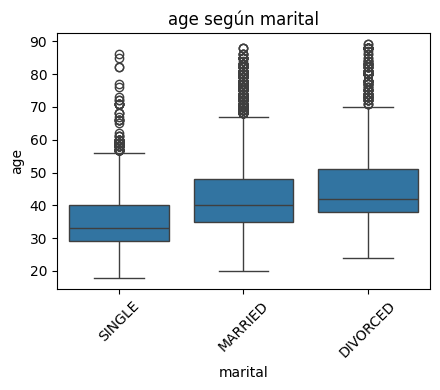

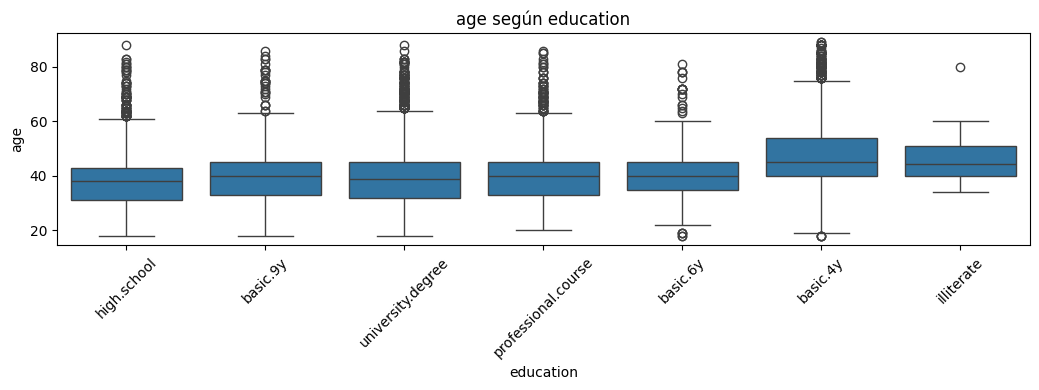

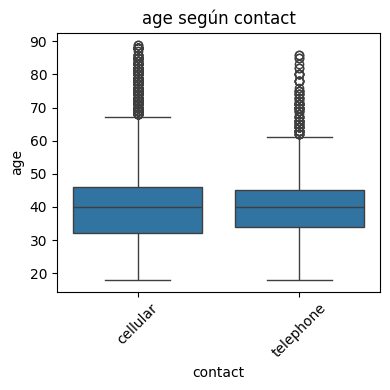

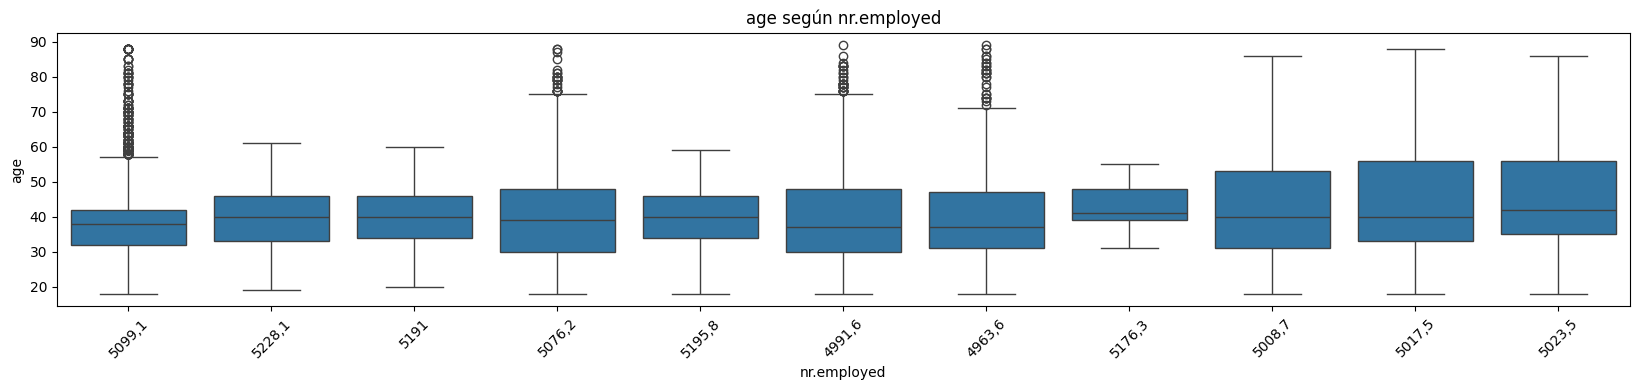

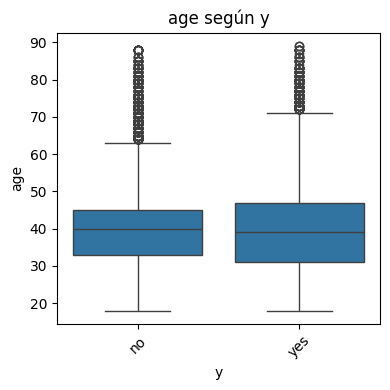

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

col_num = 'age'

# Solo columnas categóricas con pocas categorías
cols_cat = [
    col for col in df.select_dtypes(include=['object']).columns
    if df[col].nunique() <= 15 and col != 'poutcome'
]

for col in cols_cat:
    # Calcular orden de categorías
    cats_ordenadas = df.groupby(col)[col_num].mean().sort_values().index

    # Calcular dimensiones del gráfico dinámicamente
    num_cats = len(cats_ordenadas)
    fig_width = max(4, num_cats * 1.5)
    fig_height = 4

    plt.figure(figsize=(fig_width, fig_height))
    sns.boxplot(x=col, y=col_num, data=df, order=cats_ordenadas)
    plt.title(f"{col_num} según {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


En estos diagramas de caja, podemos observar la correlación entre la variable `age` con `job`, `marital`, `education`, `contact`, `nr.employed` y `y`.

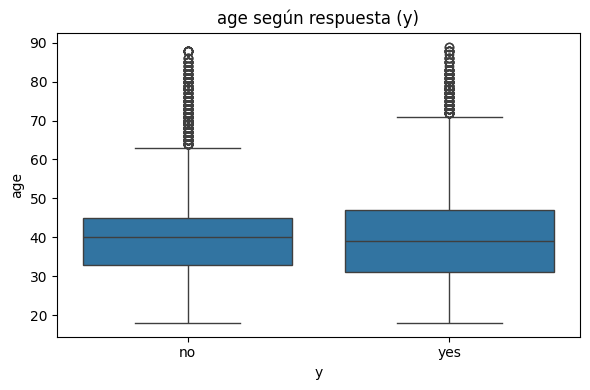

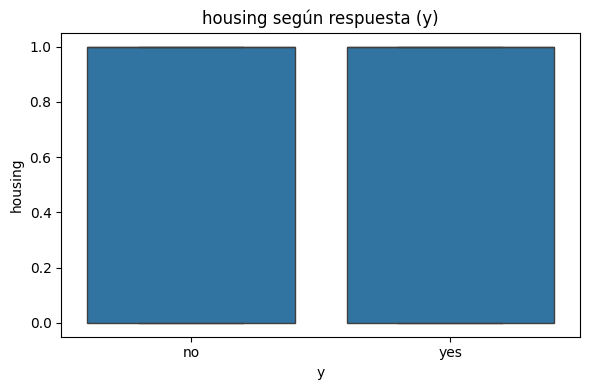

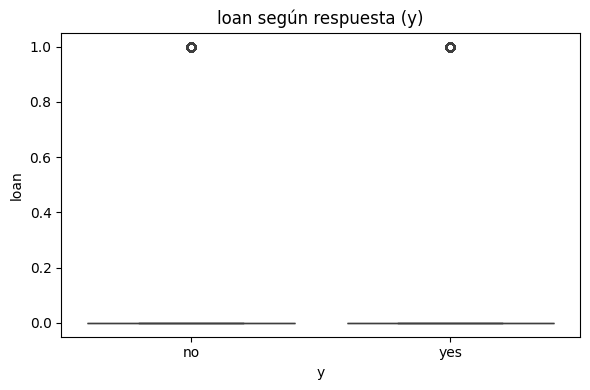

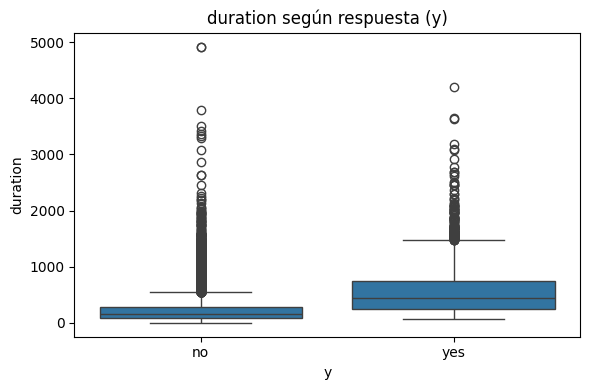

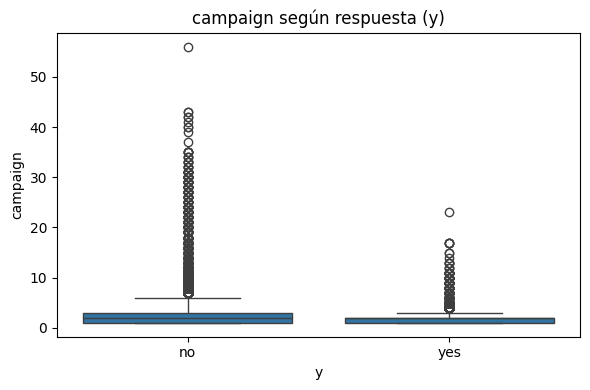

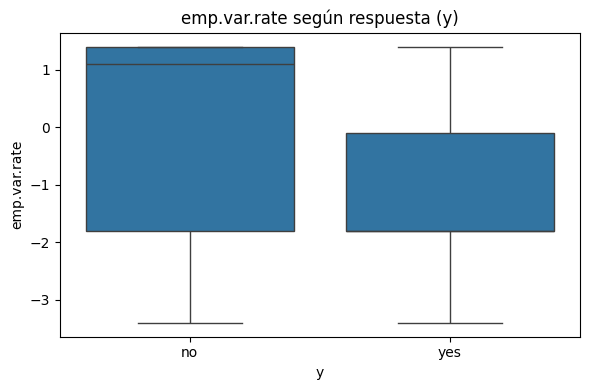

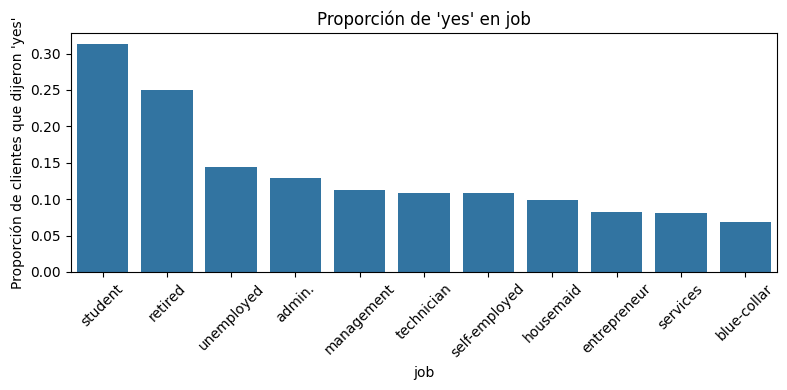

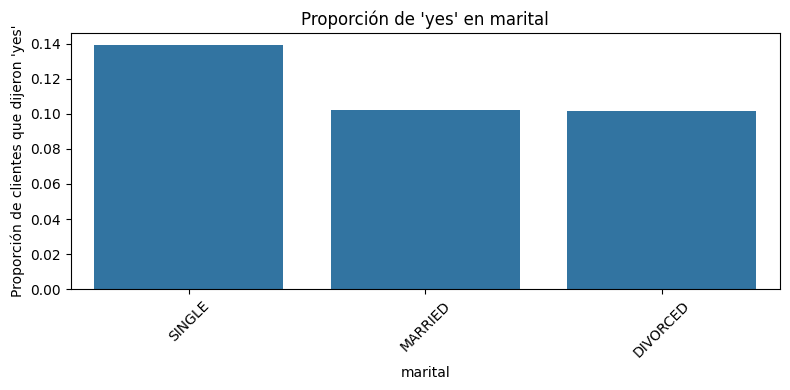

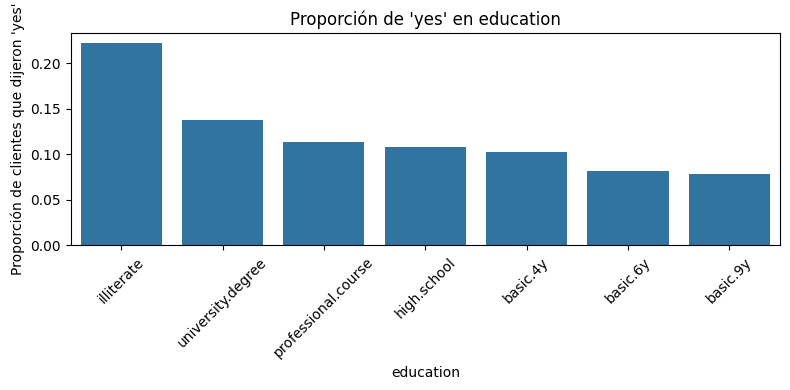

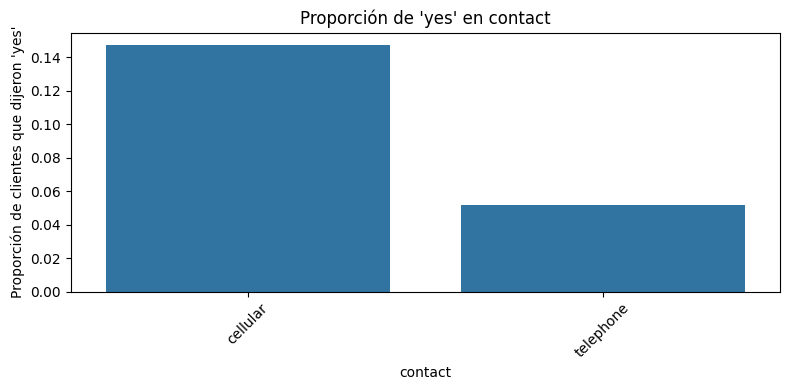

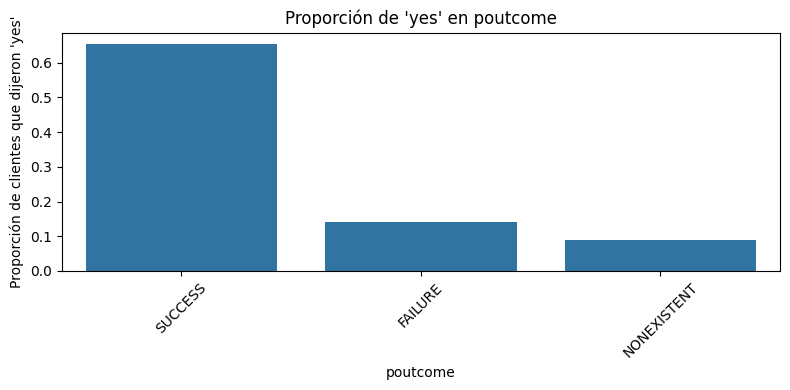

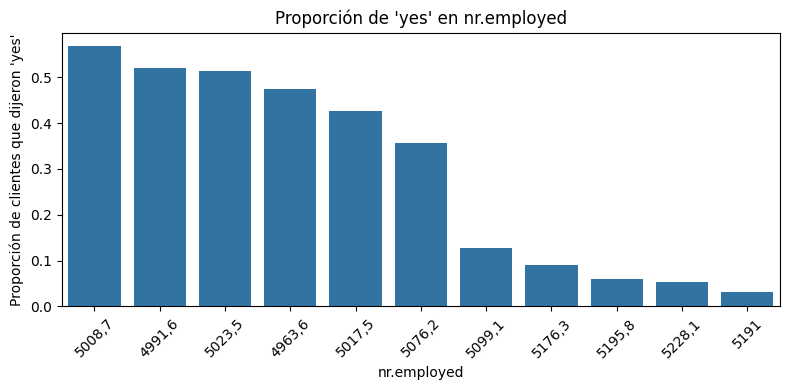

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Variables numéricas → boxplot por 'y'
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    if col == 'y':
        continue
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='y', y=col, data=df)
    plt.title(f"{col} según respuesta (y)")
    plt.tight_layout()
    plt.show()

# 2. Variables categóricas → proporción de 'yes' por categoría
cat_cols = [
    col for col in df.select_dtypes(include='object').columns
    if col != 'y' and df[col].nunique() <= 15
]

for col in cat_cols:
    prop = df.groupby(col)['y'].value_counts(normalize=True).unstack().fillna(0)

    if 'yes' in prop.columns:
        prop_yes = prop['yes']
        prop_yes = prop_yes.sort_values(ascending=False)

        plt.figure(figsize=(8, 4))
        sns.barplot(x=prop_yes.index, y=prop_yes.values)
        plt.title(f"Proporción de 'yes' en {col}")
        plt.ylabel("Proporción de clientes que dijeron 'yes'")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


En los boxplots podemos observar lo siguiente:
* `age` según `y`: muy poca diferencia entre ambos grupos.
* `housing` y `loan` según `y`: no hay diferencia.
* `duration` según `y`: gran diferencia entre 'yes' y 'no'. Los que dicen 'yes' tienen llamadas más largas.
* `campaign` según `y`: cuantos más contactos más 'no'.
* `emp.var.rate` (tasa de variación del empleo) según `y`: cuanto menor es la variación del empleo más productos bancarios se piden.

En los gráficos de barras podemos observar lo siguiente:
* proporción de 'yes' en `job`: lideran la lista 'student', 'retired' y 'unemployed'. Los que menos proporción tienen son: 'entrepreneur', 'services' y 'blue-collar'.
* proporción de 'yes' en `marital`: lidera la lista 'single' seguido de 'married' y por último 'divorced'.
* proporción de 'yes' en `education`: lideran la lista 'illiterate' con mucha diferencia con el resto.
* proporción de 'yes' en `contact`: a través de 'cellular' se ha conseguido suscribir a más clientes.
* proporción de 'yes' en `poutcome`: de los que dijeron si, podemos obtener que la campaña de marketing fue un éxito (mayoría).
* proporción de 'yes' en `nr.employed`: cómo es lógico cuanto mayor es el número de empleados, más clientes se suscriben.


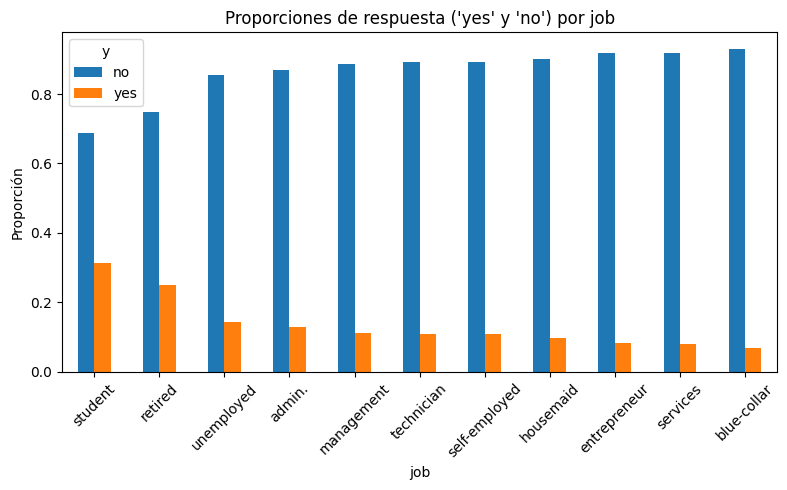

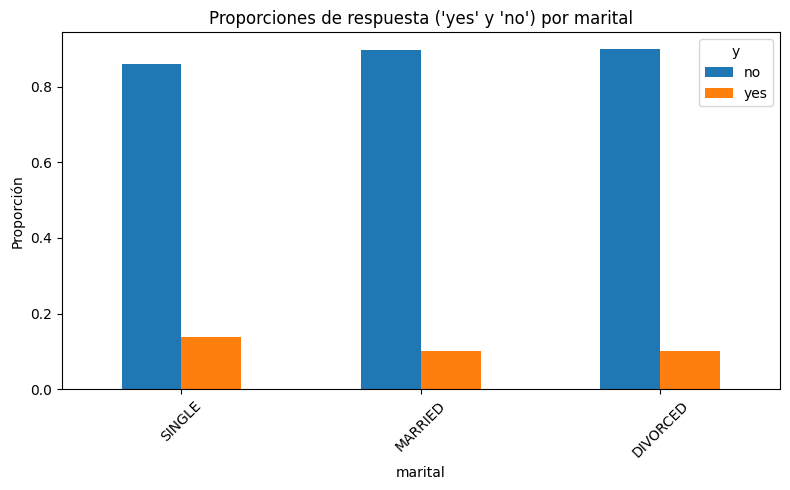

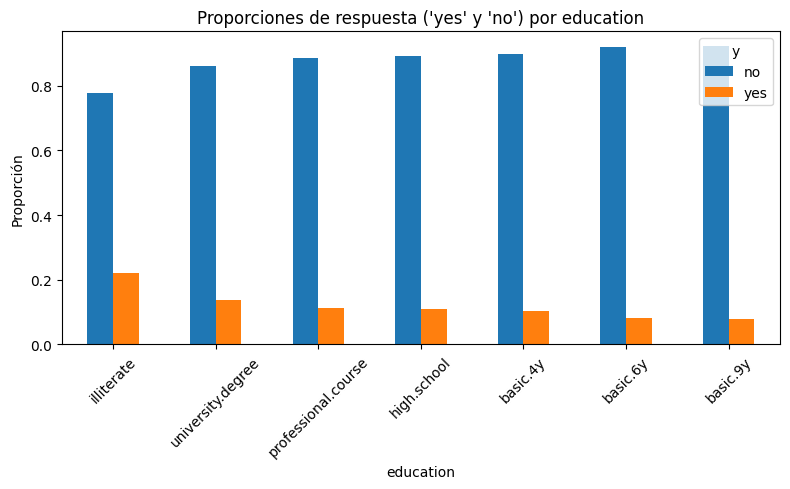

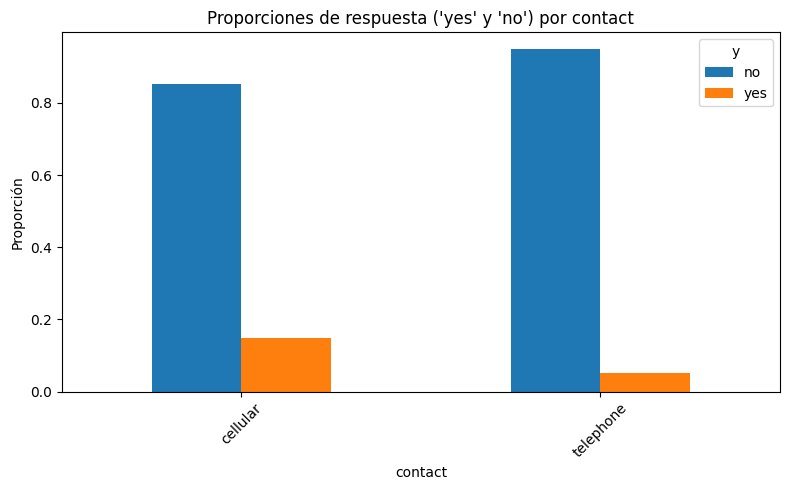

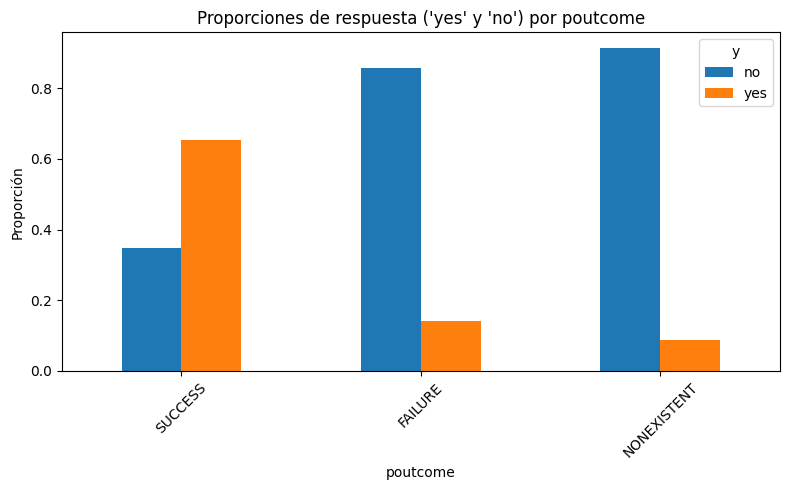

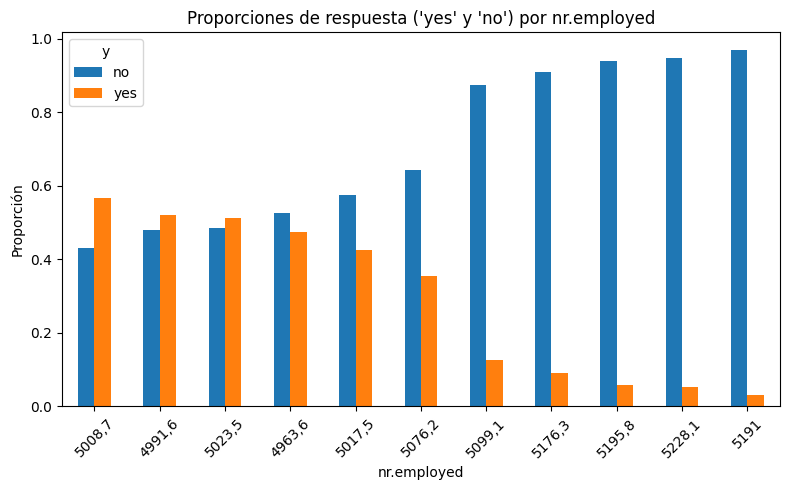

In [19]:
cat_cols = [
    col for col in df.select_dtypes(include='object').columns
    if col != 'y' and df[col].nunique() <= 15
]

for col in cat_cols:
    prop = df.groupby(col)['y'].value_counts(normalize=True).unstack().fillna(0)

    # Ordenar por 'yes' si existe
    if 'yes' in prop.columns:
        prop = prop.sort_values(by='yes', ascending=False)

    # Gráfico de barras lado a lado
    prop.plot(kind='bar', stacked=False, figsize=(8, 5))
    plt.title(f"Proporciones de respuesta ('yes' y 'no') por {col}")
    plt.ylabel("Proporción")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Estos gráficos muestran la proporción total de cada respuesta para cada categoría, visualmente comparativa.

* Es la misma información que nos ofrecen los gráficos de barras anteriores, pero ahora considerando la cantidad total de datos por categoría.
* Por ejemplo, aunque student tenga alta tasa de 'yes', su volumen total es menor que 'blue-collar', lo que ayuda a dimensionar el impacto real.

### Conclusiones finales

* `duration` es el predictor más fuerte de contratación. Cúanto mayor duración, más posibilidades de que contrate un producto bancario.
* Las variables demográficas `job`, `education`, `marital` muestran patrones claros de propensión a contratar.
* Las variables de campaña como `contact` y `poutcome` tienen impacto operativo directo sobre el éxito de las campañas.
* Las variables económicas `euribor3m`, `nr.employed` también influyen, pero de forma más contextual que personal.